In [26]:
import os
import pandas as pd
import numpy as np

### Load and review of dataset

In [7]:
housing = pd.read_csv(os.path.join('datasets', 'housing', 'housing.csv'))

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Histogram

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbabc1a2eb8>,
      dtype=object)

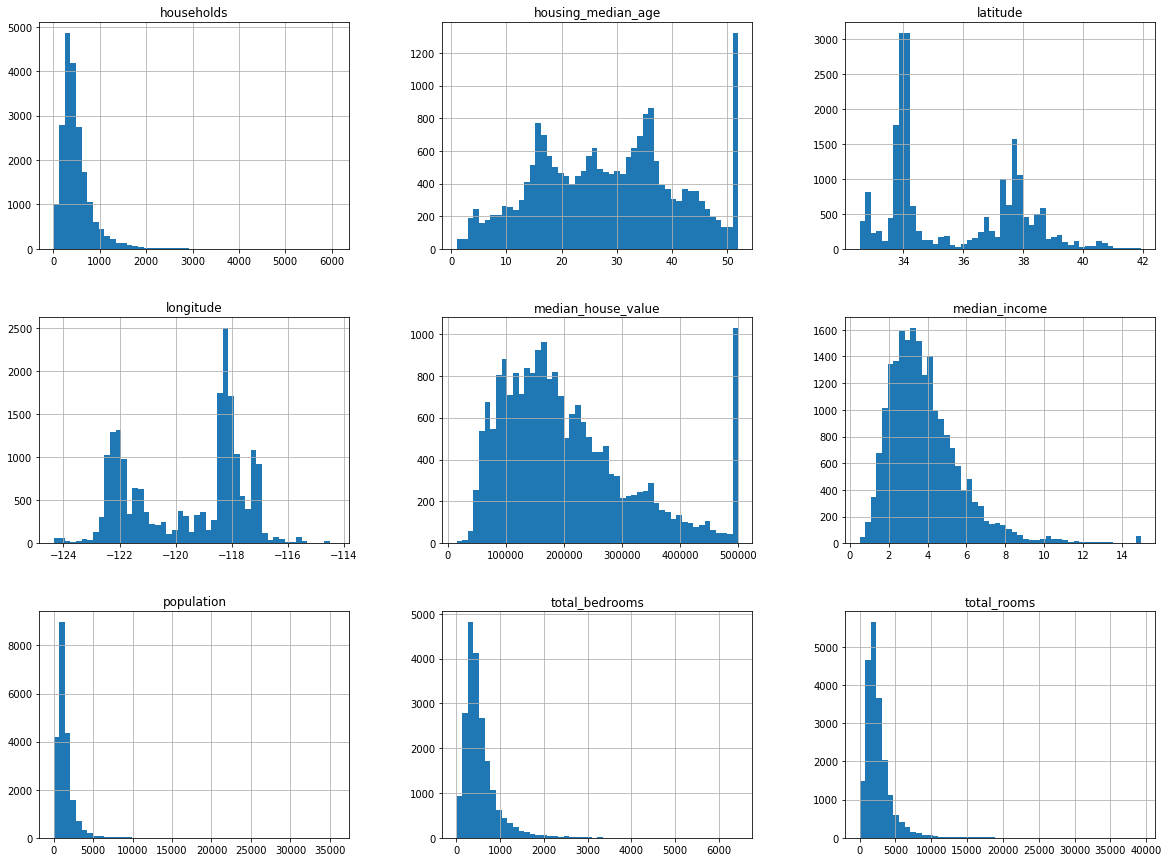

In [19]:
housing.hist(bins=50, figsize=(20, 15))

### Splitting data to test and train dataset

In [29]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices  = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

[0, 2]

In [31]:
train_set, test_set = split_train_test(housing, 0.2)
print(f"Train set size {len(train_set)}. Test set size {len(test_set)}")

Train set size 16512. Test set size 4128


##### Caution
The solution for splitting dataset to test and train subsets is very inefficient, cause will give different values everytime the script is executed. 
Even if we overcome this issue with seed, it will still not be efficient when the dataset will grow.


That's why scikit-learn provides more advanced ways to split the data.


In [32]:
from sklearn.model_selection import train_test_split

__Losowanie(próbkowanie) warstwowe(ang. stratifed sampling)__ - rozdzielenie na jednorodne podgrupy. Np. losujemy tyle samo próbek mężczyzn co kobiet(albo proporcjonalnie więcej kobiet/mężczyzn proporcjonalnie do rozmiaru populacji).

W naszym przypadku, możemy uznać, że dochody to ważne kryterium, dlatego chcemy by zbiór testowy, wiernie repreznetował różne kategorie dochodów dla całego zbioru danych.

Stwórzmy więc atrybut kategorii dochodów. Podzielimy przez 1.5 i zaokrąglimy przy użyciu __ceil__, żeby ograniczyć liczbę kategorii. A następnie scalimy wszystkie wartości większe od 5 w oddzielną kategorię.

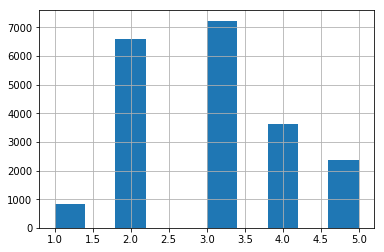

In [41]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
housing['income_cat'].hist()

Gdy mamy już wartości podzielone na kategorie, możemy przeprowadzić __próbkowanie warstwowe__ :

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [49]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

Teraz możemy usunąć niepotrzebny atrybut __income_cat__ , który przydał się tylko do podzielenia danych, a będize przeszkadzał w dalszych obliczeniach:

In [52]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

Zapisujemy dane testowe, jako nasz główny zbiór danych:

In [54]:
housing = strat_train_set.copy()

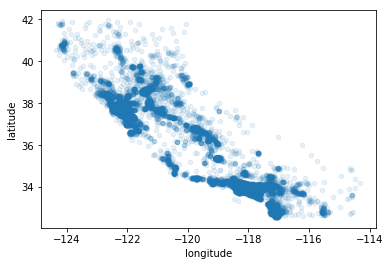

In [61]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

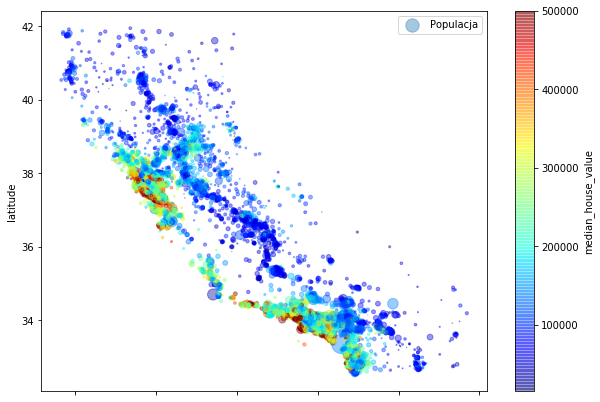

In [70]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
            s=housing['population']/100, label='Populacja', figsize=(10,7), 
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()